## Задание ЛИНЕЙНЫЙ РЕГРЕССИОННЫЙ АНАЛИЗ

Проведите **регрессионную** модель, самостоятельно **выберите** зависимую переменную (outcome) и не менее 3 независимых переменных (predictors) так, чтобы вы могли интерпретировать результаты. ВСЕ можно использовать как **численные**; в зависимости от проверяемых вами гипотез antisoc	и/или hyperact можно объявить категориальными.

В ячейке с импортируемыми библиотеками/модулями оставьте (и/или добавьте) те, которые вы будете использовать.

Для "подгонки" модели используйте **statsmodels**. Рекомендуется "**формульный** интерфейс".

**Эксплораторное** изучение данных, в т.ч. графическое,  приветствуется. В частности, предполагаемая зависимая переменная может иметь асимметричное распределение; при положительной асимметрии может понадобиться **логарифмирование** (напр, np.log() ).

Кратко **интерпретируйте** модель (комментарий о влиянии НЗП на ЗП с указанием статистики и значения *p*).

Задание предполагает обязательную **проверку предположений** модели и краткий комментарий по этому поводу. Более пространная диагностика и другие действия (напр., отбрасывание возможных outliers или другие трансформации) рассматриваются как **сверхдостаточная** работа и получают бонусы.

Визуализации приветствуются изо всех сил.

Если будуте включать фрагменты кода и продвинутые техники из ресурсов WWW, которые трудно интерпретировать самостоятельно, приведите ссылку


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.datasets import load_diabetes

In [2]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/heplots/NLSY.csv').drop(columns='rownames')

### Национальное долговременное исследование молодежи (NLSY)

— это исследование, проводимое в США, которое фокусируется на различных аспектах жизни молодежи, включая образование, трудоустройство и социальные факторы. Данные, представленные в наборе NLSY, были собраны из небольшой случайной выборки молодежи и охватывают множество переменных, которые могут быть использованы для анализа различных социальных и экономических вопросов.
Описание данных:
Датасет содержит 243 наблюдения и включает 6 переменных. Эти переменные могут включать такие аспекты, как возраст, уровень образования, доход и другие социально-экономические характеристики участников исследования.
Этот набор данных является ценным ресурсом для исследователей, интересующихся динамикой жизни молодежи в США и влиянием различных факторов на их развитие.

In [3]:
df.head(3)

,math,read,antisoc,hyperact,income,educ
0,50.00,45.24,4,3,52.518,14
1,28.57,28.57,0,0,42.600,12
2,50.00,53.57,2,2,50.000,12


#### COLUMNS:

    *math* : Math achievement test score
    *read* : Reading achievement test score
    *antisoc* : score on a measure of child's antisocial behavior, 0:6
    *hyperact* : score on a measure of child's hyperactive behavior, 0:5
    *income* : yearly income of child's father
    *educ* : years of education of child's father

### Визуализация зависимости переменных

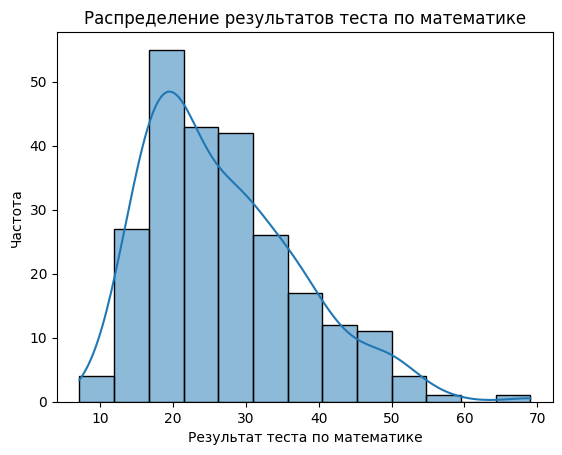

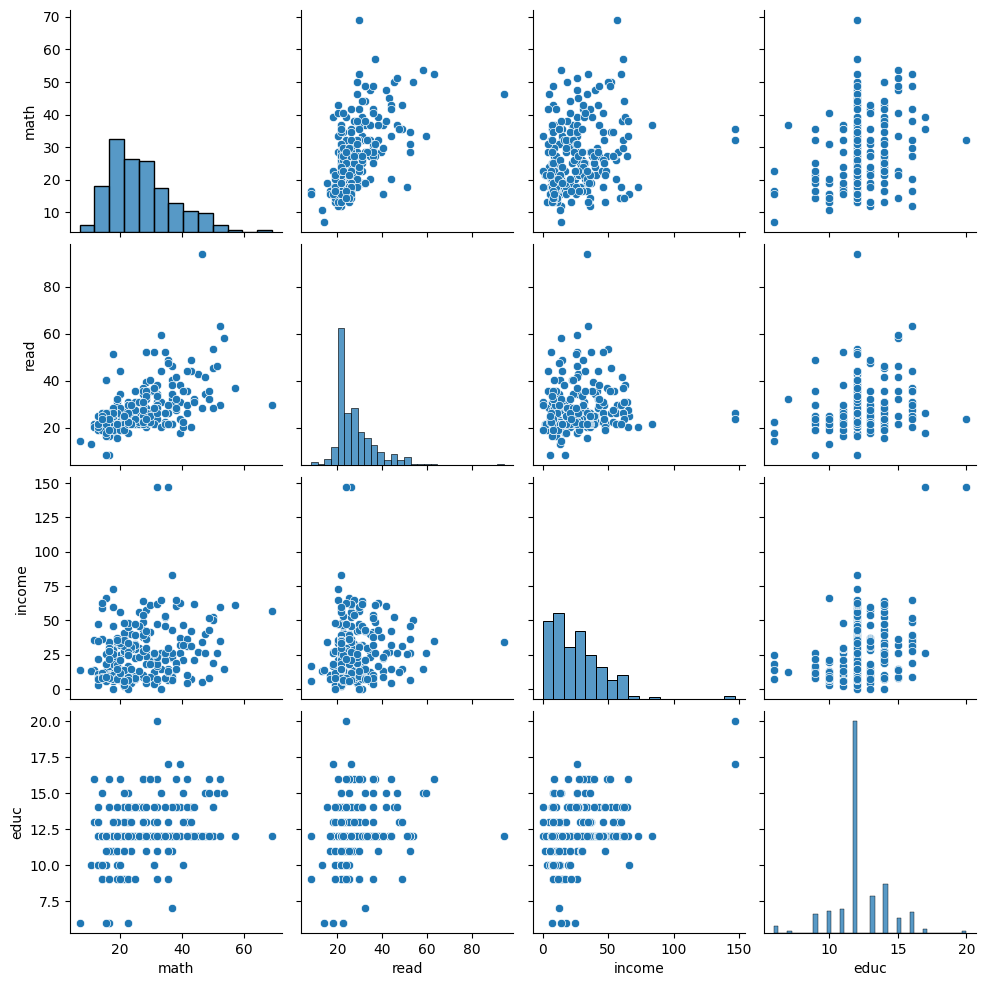

In [4]:
# Визуализация распределения зависимой переменной
sns.histplot(df['math'], kde=True)
plt.title('Распределение результатов теста по математике')
plt.xlabel('Результат теста по математике')
plt.ylabel('Частота')
plt.show()

# Визуализация зависимости
sns.pairplot(df[['math', 'read', 'income', 'educ']])
plt.show()

### Проверка на асимметрию, логорифмирование

In [5]:
# Проверка на асимметрию
print(df['math'].skew())

# Логарифмирование
df['math_log'] = np.log(df['math'] + 1)  # Добавляем 1, чтобы избежать логарифма нуля

0.8895142551476454


#### Результат проверки на ассиметрию

 = 0.89, указывает на положительную асимметрию распределения. 
    Это означает, что распределение значений зависимой переменной (в данном случае, результатов теста по математике) смещено вправо, что может свидетельствовать о наличии более низких значений, но с некоторыми высокими выбросами.
    
    Ключевые моменты:
    
    Положительная асимметрия: Значения распределены так, что хвост распределения тянется в сторону более высоких значений. Это может указывать на то, что большинство студентов показали низкие или средние результаты, но есть несколько студентов с очень высокими результатами.
    
    Интерпретация: В контексте тестов по математике это может означать, что большинство учащихся справляются с заданиями на среднем уровне, но есть несколько выдающихся учеников, которые значительно превышают средний результат.
    
    Таким образом, результат 0.89 говорит о том, что распределение не является симметричным и имеет тенденцию к положительному смещению.

### Построение модели

In [6]:
# Определяем независимые переменные
X = df[['income', 'educ', 'antisoc', 'hyperact']]
X = sm.add_constant(X)  # Добавляем константу

# Зависимая переменная
y = df['math_log']  # Используем логарифмированную переменную, если это необходимо

# Построение модели
model = sm.OLS(y, X).fit()

# Вывод результатов
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               math_log   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     9.423
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           4.36e-07
Time:                        12:04:44   Log-Likelihood:                -83.661
No. Observations:                 243   AIC:                             177.3
Df Residuals:                     238   BIC:                             194.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5735      0.155     16.642      0.0

### Проверка гипотез

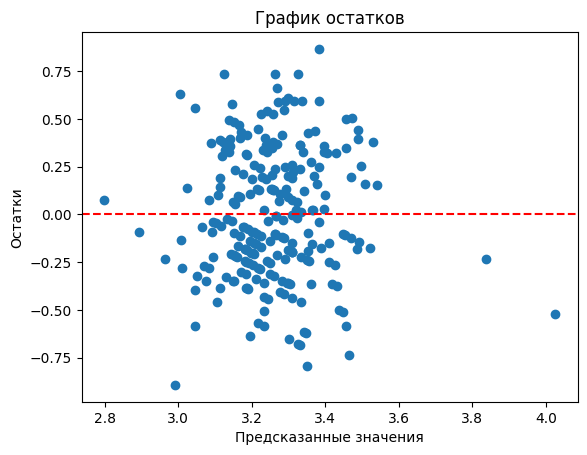

In [7]:
# ЛИНЕЙНОСТЬ
# Предположим, что у вас есть модель OLS
model = sm.OLS(y, X).fit()  # y - зависимая переменная, X - независимые переменные

# Получаем остатки и предсказанные значения
residuals = model.resid
predicted = model.fittedvalues

# Строим график остатков
plt.scatter(predicted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

#  Если остатки распределены случайным образом, это подтверждает линейность:

#### Если при проверке линейности наблюдается облако точек вокруг горизонтального тренда, это может указывать на отсутствие линейной зависимости между независимыми переменными и зависимой переменной. В таком случае, модель линейной регрессии может не подходить для ваших данных, и стоит рассмотреть возможность использования других моделей, таких как полиномиальная регрессия или другие нелинейные методы. Это также может означать, что в данных присутствуют другие факторы, которые не учитываются в текущей модели.

Shapiro-Wilk Test Statistic: 0.9892684903794297
p-value: 0.06822010585842218


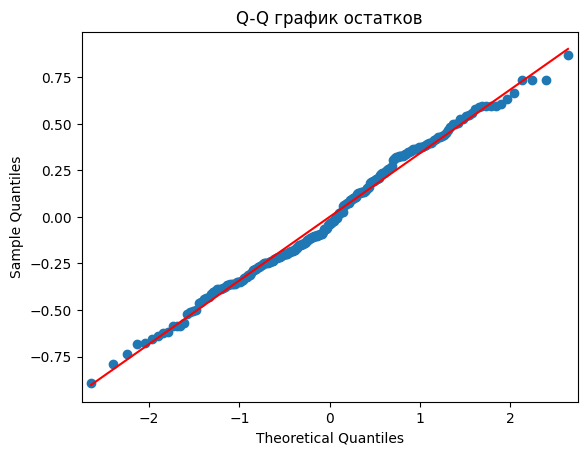

In [8]:
# Проверка НОРМАЛЬНОСТИ:
import scipy.stats as stats

# Тест Шапиро-Уилка
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk Test Statistic:', shapiro_test.statistic)
print('p-value:', shapiro_test.pvalue)

# Q-Q график
sm.qqplot(residuals, line='s')
plt.title('Q-Q график остатков')
plt.show()

{'LM Statistic': np.float64(2.104049889338487), 'LM-Test p-value': np.float64(0.7166283872009536), 'F-statistic': np.float64(0.519688970935917), 'F-test p-value': np.float64(0.7213412541366662)}


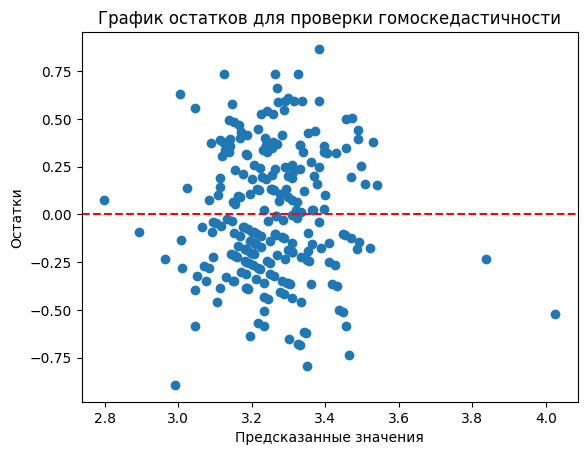

In [9]:
# Проверка ГОМОСКЕДАКТИЧНОСТИ
from statsmodels.stats.diagnostic import het_breuschpagan

# Тест Бреуша-Пагана
bp_test = het_breuschpagan(residuals, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-statistic', 'F-test p-value']
print(dict(zip(labels, bp_test)))

# График остатков против предсказанных значений
plt.scatter(predicted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков для проверки гомоскедастичности')
plt.show()

## Интерпретация результатов линейной регрессии

Результаты линейной регрессии, представленные в таблице, содержат важную информацию о зависимости между зависимой переменной (логарифмированным значением оценок по математике, math_log) и независимыми переменными (предикторами): income, educ, antisoc, и hyperact.

    1. Общая информация о модели:


   - R-squared (R²): 0.137. Это означает, что примерно 13.7% вариации в зависимой переменной объясняется моделью. Это относительно низкое значение, что может указывать на то, что другие факторы, не включенные в модель, могут также влиять на оценки по математике.
   - F-statistic: 9.423 с p-значением 4.36e-07. Это говорит о том, что модель в целом статистически значима, и хотя бы один из предикторов имеет значительное влияние на зависимую переменную.



    2. Коэффициенты предикторов:


   - const (константа): 2.5735. Это является средним значением math_log, когда все предикторы равны нулю
   - income: 0.0031. указывает на положительное влияние дохода на math_log. Это значит, что с увеличением дохода, логарифм математических оценок также увеличивается. Это значение статистически значимо (p = 0.008).
   - educ: 0.0493. Это говорит о том, что при увеличении уровня образования на 1 единицу, логарифмированное значение оценок по математике увеличивается в среднем на 0.0493. Это также статистически значимо (p < 0.001).
   - antisoc: 0.0391. Это значение указывает на то, что при увеличении уровня антисоциального поведения на 1 единицу, логарифмированное значение оценок по математике увеличивается на 0.0391. Это значение статистически значимо (p = 0.032).
   - hyperact: -0.0314. Это означает, что при увеличении уровня гиперактивности на 1 единицу, логарифмированное значение оценок по математике уменьшается на 0.0314. Это значение близко к статистической значимости (p = 0.068), может указывать на негативное влияние гиперактивности на math_log.


    3. Проверка гипотез модели:
    
    1) Линейность.
    Линейность: Если линейность не подтверждается, что может указывать на необходимость использования более сложной модели или трансформации переменных.

    2) Нормальность остатков
    Результаты теста Шапиро-Уилка показали статистику 0.989 и p-value 0.068. Это говорит о том, что остатки могут быть нормально распределены, но p-value близок к 0.05, что указывает на необходимость дальнейшего анализа.
    
    3) Гомоскедастичность
    Результаты теста на гомоскедастичность показали LM Statistic равный 2.104 и p-value 0.716. Высокие p-value для тестов на гомоскедастичность указывают на то, что дисперсия остатков постоянна (нет оснований отвергать гипотезу о гомоскедастичности), что является хорошим знаком для модели.
    

        ЗАКЛЮЧЕНИЕ:
    
    В целом, результаты линейной регрессии показывают, что некоторые предикторы имеют значительное влияние на зависимую переменную, однако низкий R-квадрат и отсутствие подтверждения линейности могут указывать на необходимость дальнейшего анализа и возможного использования других методов моделирования. Рекомендуется также провести дополнительные тесты и визуализации для более глубокого понимания данных.
    
    Основные выводы:
    
    1) Положительное влияние образования и дохода: Модель показывает, что уровень образования и дохода имеют положительное влияние на оценки по математике. Это подтверждает важность этих факторов в образовательных достижениях.
    2) Антисоциальное поведение: Также наблюдается положительное влияние антисоциального поведения на оценки, что может указывать на сложные взаимосвязи между поведением и академической успеваемостью.
    3) Отрицательное влияние гиперактивности: Гиперактивность, напротив, имеет отрицательное влияние на оценки, что может свидетельствовать о необходимости поддержки таких учеников.


## Рекомендации:

    
    1) Улучшение модели: Учитывая низкое значение R² (0.137), рекомендуется рассмотреть возможность включения дополнительных предикторов, таких как социально-экономический статус, поддержка родителей, или другие психологические факторы, которые могут влиять на успеваемость. 
    
    2) Дополнительные исследования: Проведение дополнительных исследований для более глубокого понимания влияния антисоциального поведения и гиперактивности на учебные достижения. Это может помочь в разработке более эффективных образовательных программ и вмешательств. 
    
    3) Фокус на поддержке: Разработка программ поддержки для учеников с гиперактивностью, чтобы минимизировать их отрицательное влияние на успеваемость.
    

    Эти рекомендации могут помочь в улучшении образовательных результатов и более точном понимании факторов, влияющих на успеваемость в математике.